<a href="https://colab.research.google.com/github/notShyam7/life-expectancy/blob/main/LifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Introduction**
#### **Dataset: Life Expectancy (WHO)**

This dataset is composed of data from all over the world from various countries aggregated by the World Health Organization (WHO for short). The data is an aggregate of many indicators for a particular country in a particular year.

In this dataset from the years 2000-2015 for 193 countries has been considered for analysis. <b>The dataset consists of 22 Columns and 2938 rows.</b> This study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well.

Since the observations in this dataset are based on different countries, it will be easier for a country **to determine the predicting factor which is contributing to lower value of life expectancy.** This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.



**Columns:**

* **Country**

* **Year**

* **Status**: Developed or Developing status of the country

* **Life Expectancy**: Life Expectancy in age

* **Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

* **Infant Deaths**: Number of Infant Deaths per 1000 population (0-1 year of age)

* **Alcohol**: Alcohol, recorded per capita (15+ age) consumption (in liters of pure alcohol)

* **Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)

* **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

* **Measles**: number of reported cases per 1000 population

* **BMI**: Average Body Mass Index of entire population

* **Under Five Deaths**: Number of under-five deaths per 1000 population

* **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%)

* **Total Expenditure**: General government expenditure on health as a percentage of total government expenditure (%)

* **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

* **HIV/AIDS**: Deaths per 1000 live births (0-4 years)

* **GDP**: Gross Domestic Product per capita (in USD)

* **Population**: Population of the country

* **Thinness 10-19 Years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)

* **Thinness 5-9 Years**: Prevalence of thinness among children for Age 5 to 9 (%)

* **Income Composition of Resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

* **Schooling**: Number of years of Schooling (years)

In [3]:
# importing dataset
life = pd.read_csv('/content/drive/MyDrive/Life Expectancy/Life Expectancy Data.csv')

In [4]:
# displays the first five rows of the dataset
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# dimensions of the dataset
life.shape

(2938, 22)

#### **Data Cleaning**

In [6]:
# removing trailing spaces in column names
orig_cols = list(life.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
life.columns = new_cols

In [7]:
life.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
# renaming the improper column name
life.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

In [9]:
life.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [10]:
# information of the datatypes of the columns in the dataset, it shows the number of numerical and categorical columns
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [11]:
# descriptive statistics of numerical columns
life.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [12]:
# displays the total number of null values for each column in the dataset
life.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [13]:
# percentage of null values for each column out of total number of null values
life.isnull().sum()*100/life.isnull().count()

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
infant_deaths                       0.000000
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_b                        18.822328
measles                             0.000000
bmi                                 1.157250
under-five_deaths                   0.000000
polio                               0.646698
total_expenditure                   7.692308
diphtheria                          0.646698
hiv/aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness_10-19_years                1.157250
thinness_5-9_years                  1.157250
income_composition_of_resources     5.684139
schooling                           5.547992
dtype: flo

In [14]:
countries = life['country'].unique()
fill_list = ['life_expectancy','adult_mortality','alcohol','hepatitis_b','bmi','polio','total_expenditure','diphtheria','gdp','population','thinness_10-19_years','thinness_5-9_years','income_composition_of_resources','schooling']

In [15]:
# treating null values using interpolation.
for country in countries:
    life.loc[life['country'] == country,fill_list] = life.loc[life['country'] == country,fill_list].interpolate()

# dropping remaining null values after interpolation.
life.dropna(inplace=True)

In [16]:
# number of null values in each column after imputing
life.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_10-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [17]:
life.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,36.428636,50.932562,80.371917,5.902728,80.454454,2.274937,5392.335709,1.358390e+07,5.129995,5.199346,0.603453,11.639054
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,19.736138,188.933117,24.363376,2.287467,24.450153,6.005112,11480.810350,6.490113e+07,4.750149,4.844382,0.206026,3.212964
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,18.150000,1.000000,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,38.700000,4.000000,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,55.000000,36.000000,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,212183.000000,77.100000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.936000,20.700000


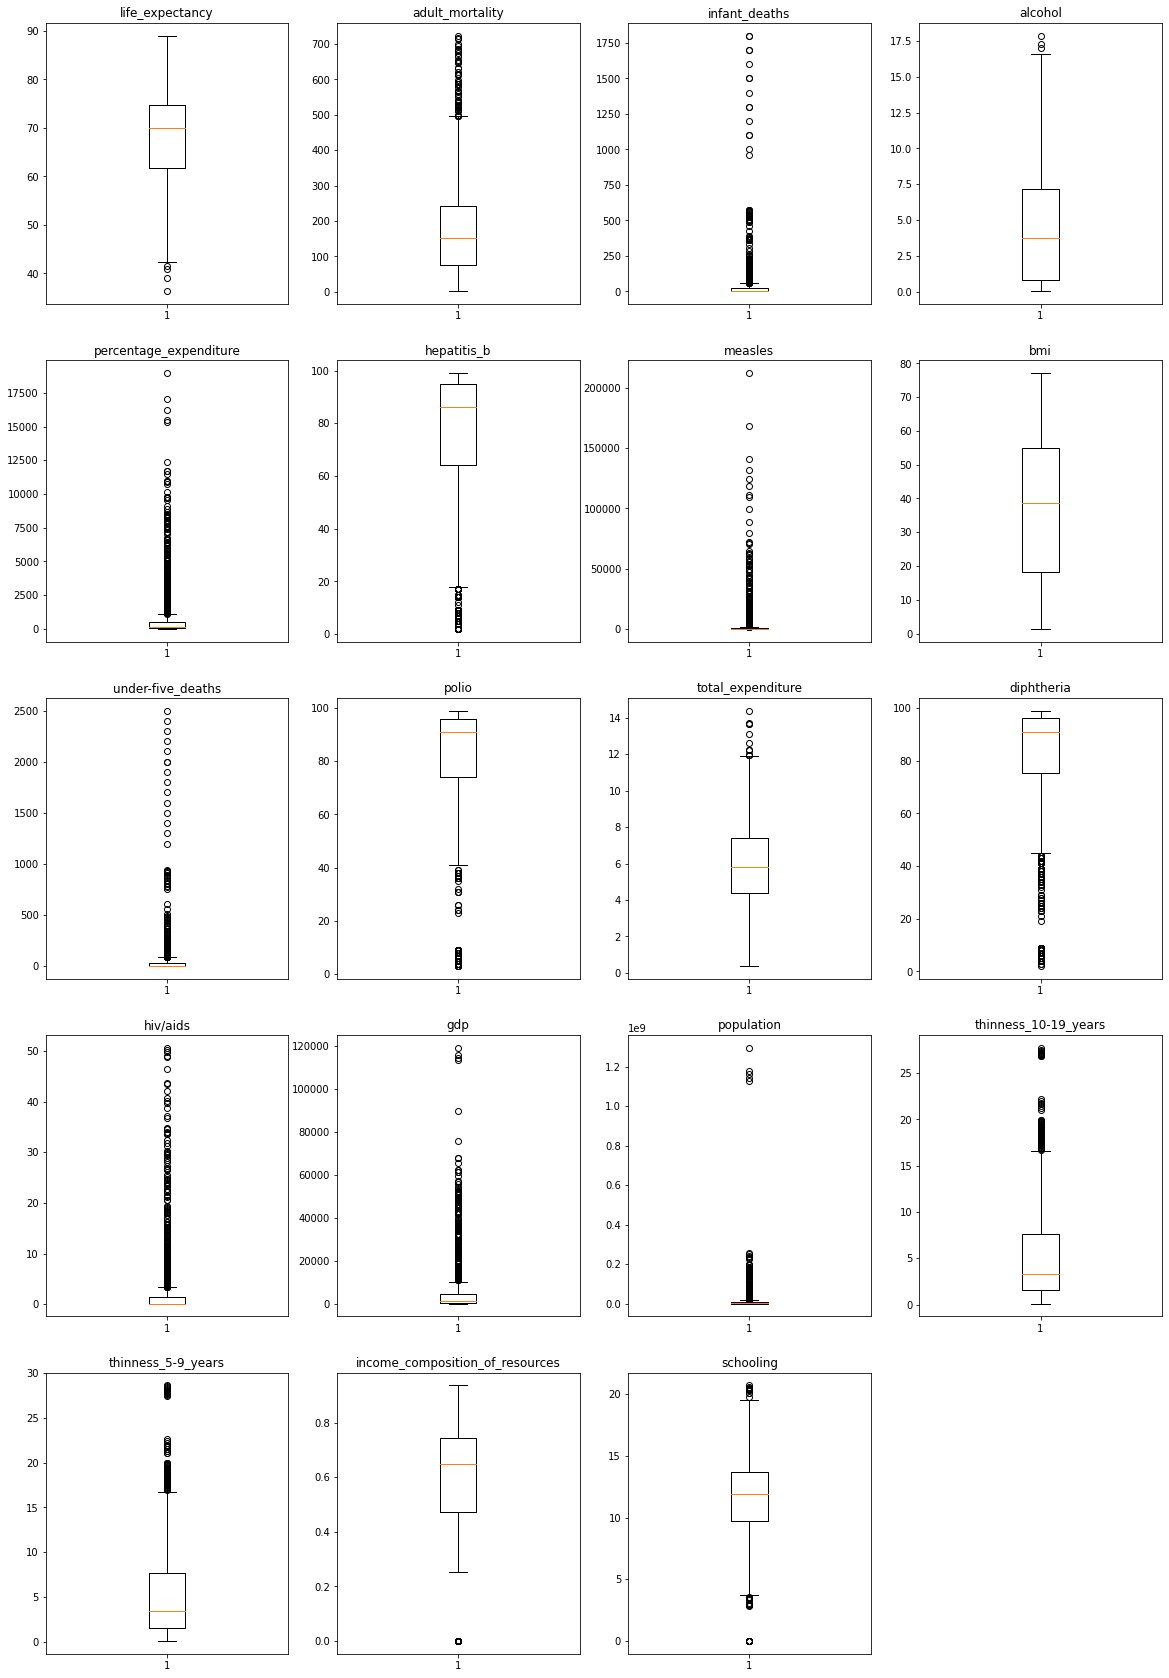

In [18]:
# creating a dictionary of columns.
col_dict = {'life_expectancy':1,'adult_mortality':2,'infant_deaths':3,'alcohol':4,'percentage_expenditure':5,'hepatitis_b':6,'measles':7,'bmi':8,'under-five_deaths':9,'polio':10,'total_expenditure':11,'diphtheria':12,'hiv/aids':13,'gdp':14,'population':15,'thinness_10-19_years':16,'thinness_5-9_years':17,'income_composition_of_resources':18,'schooling':19}

# detecting outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
    plt.subplot(5,4,i)
    plt.boxplot(life[variable],whis=1.5)
    plt.title(variable)

plt.show()

In [19]:
# calculating number of outliers and its percentage in each variable using Tukey's method.

for variable in col_dict.keys():
    q75, q25 = np.percentile(life[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((life[variable] > max_val) | 
                                                                                           (life[variable] < min_val))[0])),len((np.where((life[variable] > max_val) | 
                                                                                           (life[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in life_expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in adult_mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in infant_deaths : 198 and 9.96477101157524
Number of outliers and percentage of it in alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in percentage_expenditure : 232 and 11.675893306492199
Number of outliers and percentage of it in hepatitis_b : 216 and 10.870659285354806
Number of outliers and percentage of it in measles : 361 and 18.16809260191243
Number of outliers and percentage of it in bmi : 0 and 0.0
Number of outliers and percentage of it in under-five_deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in polio : 159 and 8.002013085052843
Number of outliers and percentage of it in total_expenditure : 13 and 0.6542526421741318
Number of outliers and percentage of it in diphtheria : 195 and 9.813789632611979
Number of

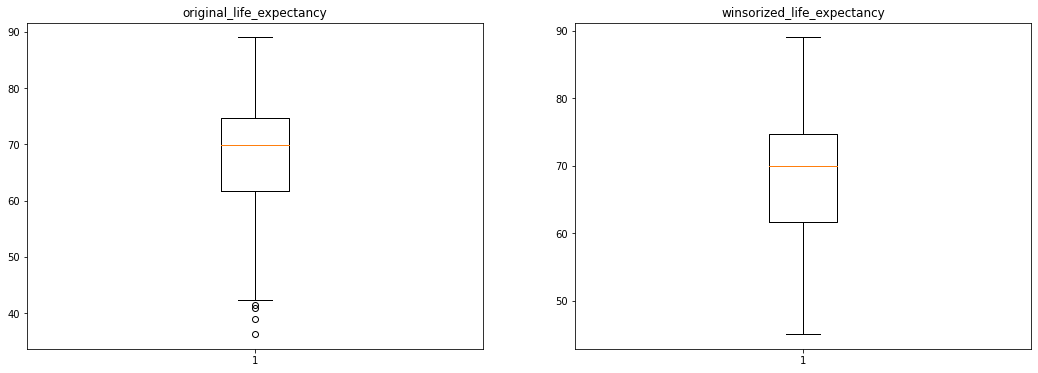

In [20]:
# removing outliers in the variables using Winsorization technique.
# Winsorize life_expectancy
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_life_expectancy = life['life_expectancy']
plt.boxplot(original_life_expectancy)
plt.title("original_life_expectancy")

plt.subplot(1,2,2)
winsorized_life_expectancy = winsorize(life['life_expectancy'],(0.01,0))
plt.boxplot(winsorized_life_expectancy)
plt.title("winsorized_life_expectancy")

plt.show()

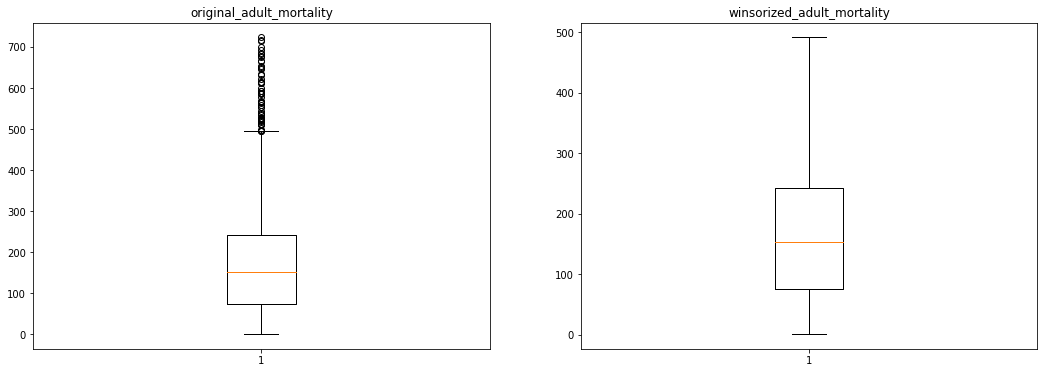

In [21]:
# Winsorize adult_mortality
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_adult_mortality = life['adult_mortality']
plt.boxplot(original_adult_mortality)
plt.title("original_adult_mortality")

plt.subplot(1,2,2)
winsorized_adult_mortality = winsorize(life['adult_mortality'],(0,0.03))
plt.boxplot(winsorized_adult_mortality)
plt.title("winsorized_adult_mortality")

plt.show()

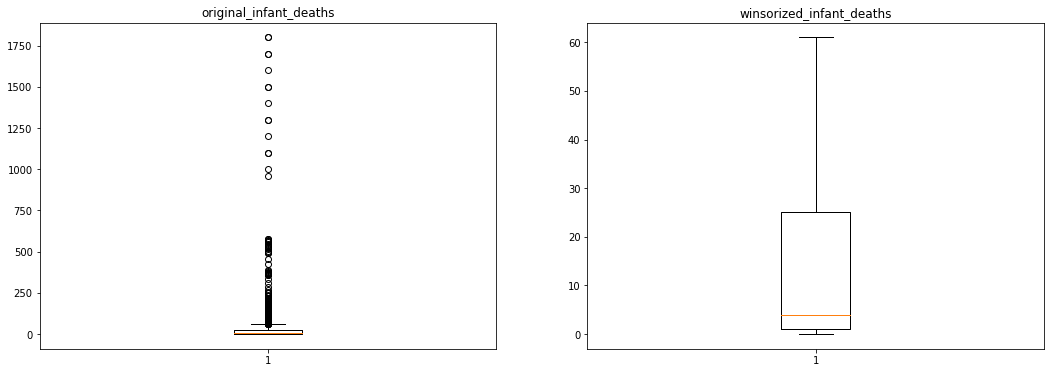

In [22]:
# Winsorize infant_deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_infant_deaths = life['infant_deaths']
plt.boxplot(original_infant_deaths)
plt.title("original_infant_deaths")

plt.subplot(1,2,2)
winsorized_infant_deaths = winsorize(life['infant_deaths'],(0,0.10))
plt.boxplot(winsorized_infant_deaths)
plt.title("winsorized_infant_deaths")

plt.show()

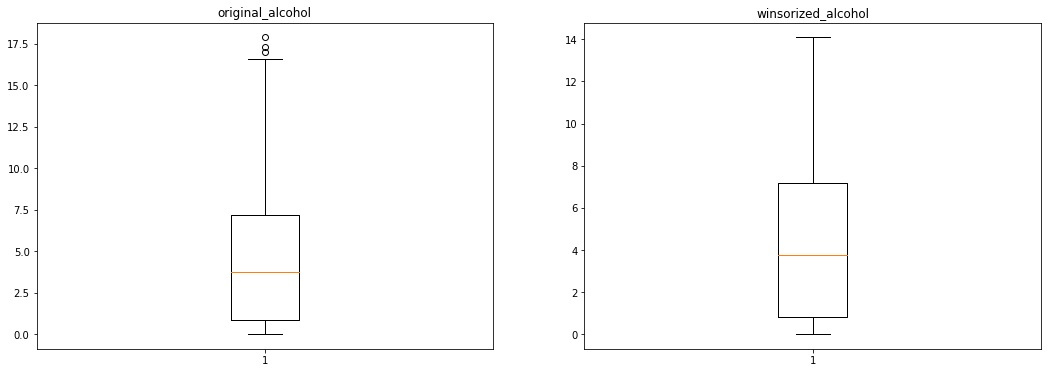

In [23]:
# Winsorize alcohol
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_alcohol = life['alcohol']
plt.boxplot(original_alcohol)
plt.title("original_alcohol")

plt.subplot(1,2,2)
winsorized_alcohol = winsorize(life['alcohol'],(0,0.01))
plt.boxplot(winsorized_alcohol)
plt.title("winsorized_alcohol")

plt.show()

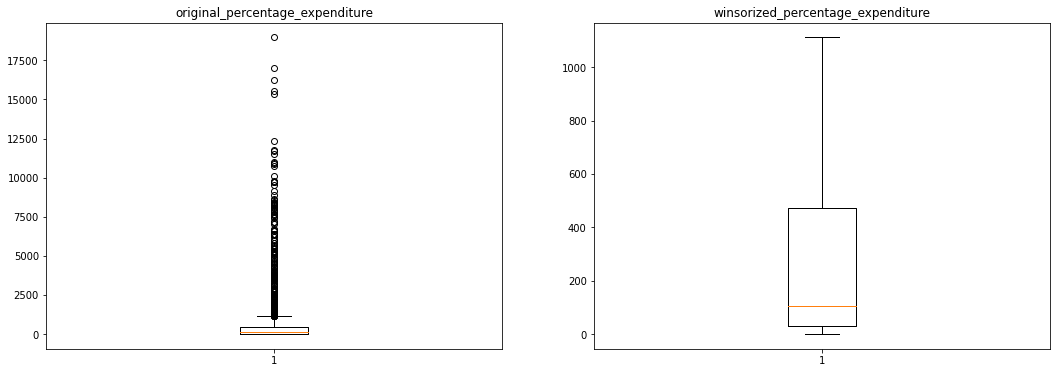

In [24]:
# Winsorize percentage_expenditure
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_percentage_expenditure = life['percentage_expenditure']
plt.boxplot(original_percentage_expenditure)
plt.title("original_percentage_expenditure")

plt.subplot(1,2,2)
winsorized_percentage_expenditure = winsorize(life['percentage_expenditure'],(0,0.12))
plt.boxplot(winsorized_percentage_expenditure)
plt.title("winsorized_percentage_expenditure")

plt.show()

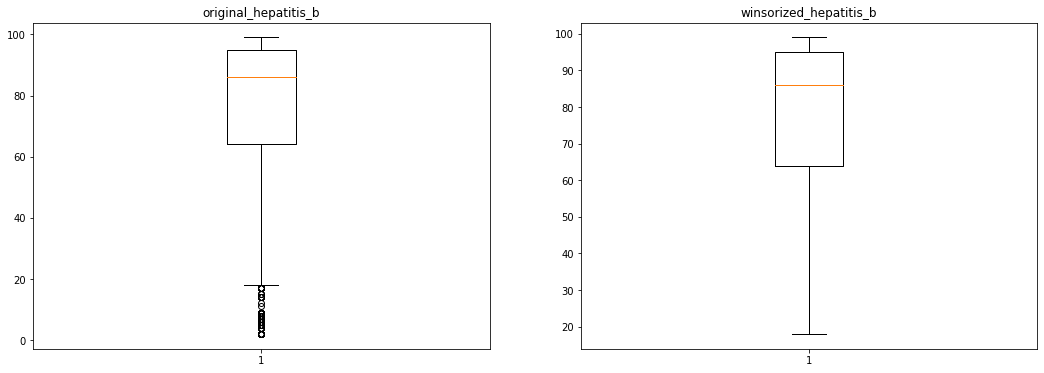

In [25]:
# Winsorize hepatitis_b
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_hepatitis_b = life['hepatitis_b']
plt.boxplot(original_hepatitis_b)
plt.title("original_hepatitis_b")

plt.subplot(1,2,2)
winsorized_hepatitis_b = winsorize(life['hepatitis_b'],(0.11,0))
plt.boxplot(winsorized_hepatitis_b)
plt.title("winsorized_hepatitis_b")

plt.show()

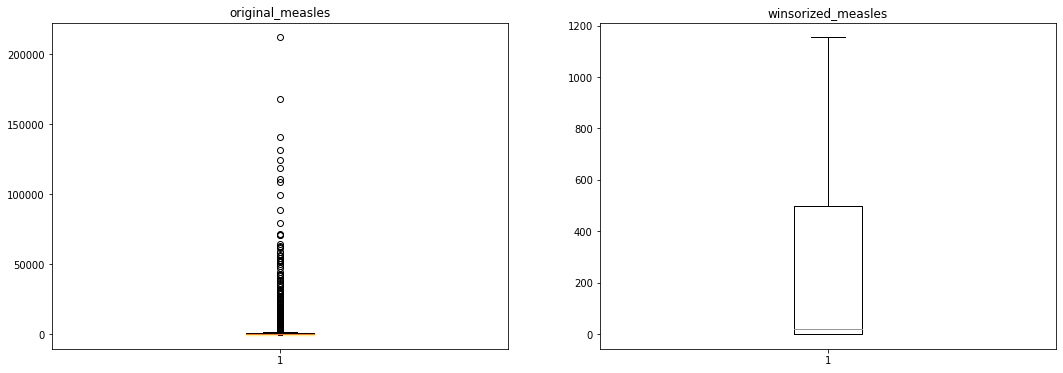

In [26]:
# Winsorize measles
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_measles = life['measles']
plt.boxplot(original_measles)
plt.title("original_measles")

plt.subplot(1,2,2)
winsorized_measles = winsorize(life['measles'],(0,0.19))
plt.boxplot(winsorized_measles)
plt.title("winsorized_measles")

plt.show()


In [27]:
life = life.drop('measles',axis=1)

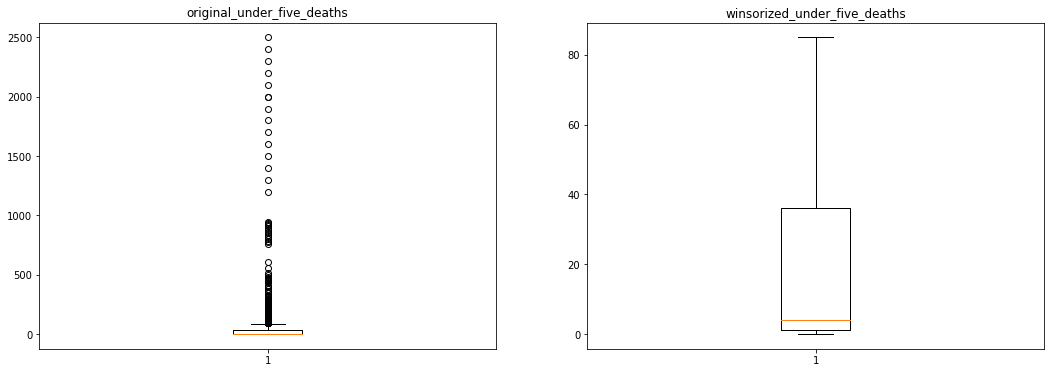

In [28]:
# Winsorize under-five_deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_under_five_deaths = life['under-five_deaths']
plt.boxplot(original_under_five_deaths)
plt.title("original_under_five_deaths")

plt.subplot(1,2,2)
winsorized_under_five_deaths = winsorize(life['under-five_deaths'],(0,0.12))
plt.boxplot(winsorized_under_five_deaths)
plt.title("winsorized_under_five_deaths")

plt.show()

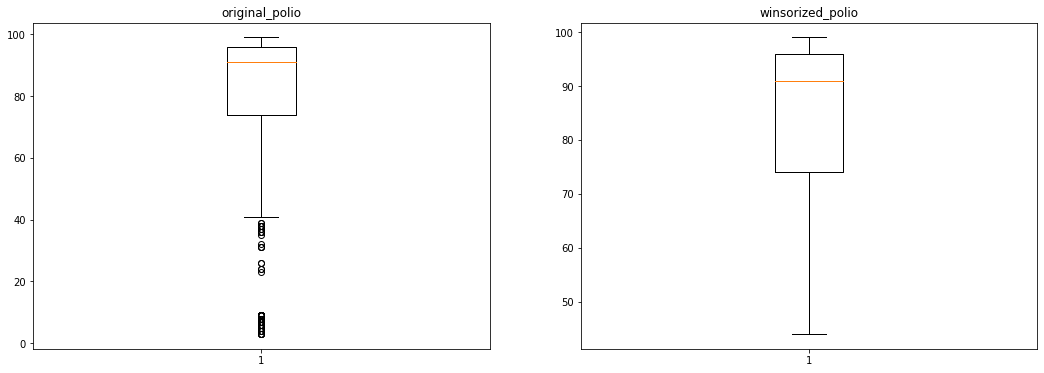

In [29]:
# Winsorize polio
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_polio = life['polio']
plt.boxplot(original_polio)
plt.title("original_polio")

plt.subplot(1,2,2)
winsorized_polio = winsorize(life['polio'],(0.09,0))
plt.boxplot(winsorized_polio)
plt.title("winsorized_polio")

plt.show()

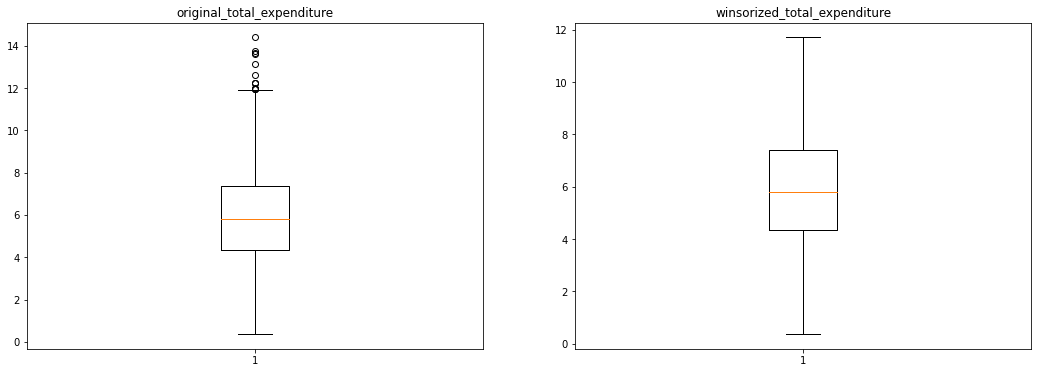

In [30]:
# Winsorize total_expenditure
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_total_expenditure = life['total_expenditure']
plt.boxplot(original_total_expenditure)
plt.title("original_total_expenditure")

plt.subplot(1,2,2)
winsorized_total_expenditure = winsorize(life['total_expenditure'],(0,0.01))
plt.boxplot(winsorized_total_expenditure)
plt.title("winsorized_total_expenditure")

plt.show()

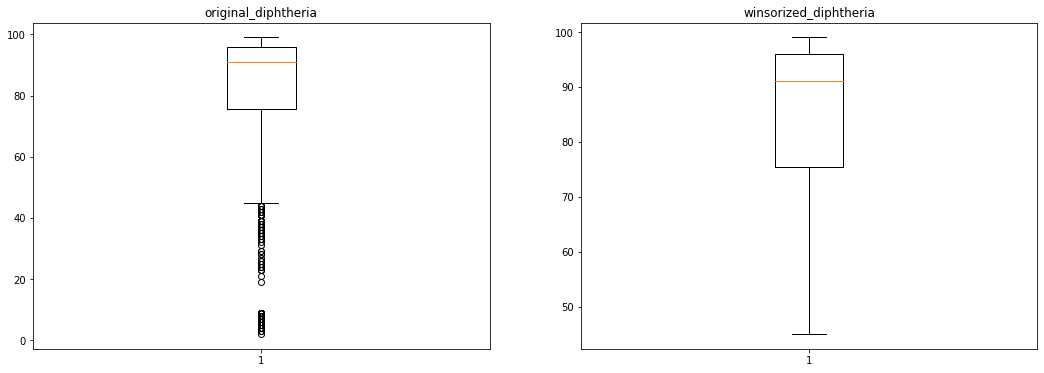

In [31]:
# Winsorize diphtheria
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_diphtheria = life['diphtheria']
plt.boxplot(original_diphtheria)
plt.title("original_diphtheria")

plt.subplot(1,2,2)
winsorized_diphtheria = winsorize(life['diphtheria'],(0.10,0))
plt.boxplot(winsorized_diphtheria)
plt.title("winsorized_diphtheria")

plt.show()

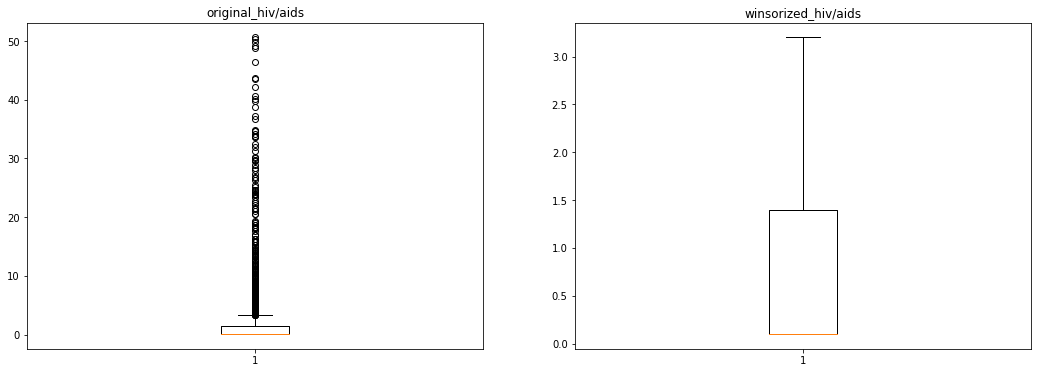

In [32]:
# Winsorize hiv/aids
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_hiv_aids = life['hiv/aids']
plt.boxplot(original_hiv_aids)
plt.title("original_hiv/aids")

plt.subplot(1,2,2)
winsorized_hiv_aids = winsorize(life['hiv/aids'],(0,0.16))
plt.boxplot(winsorized_hiv_aids)
plt.title("winsorized_hiv/aids")

plt.show()

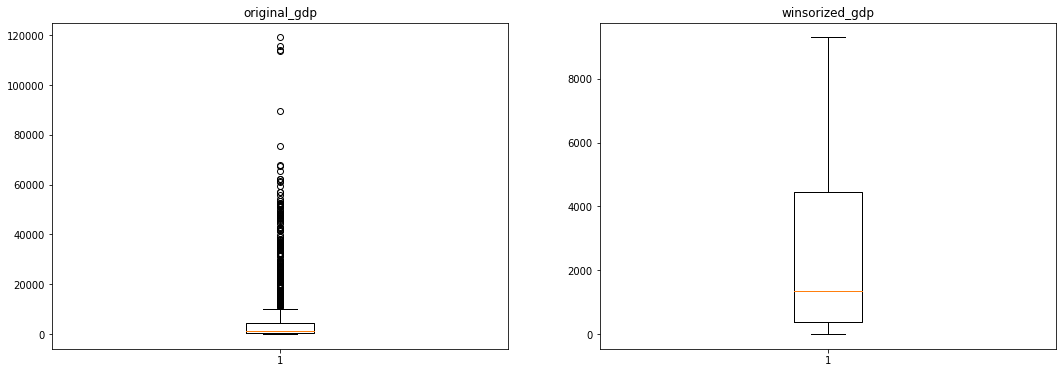

In [33]:
# Winsorize gdp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_gdp = life['gdp']
plt.boxplot(original_gdp)
plt.title("original_gdp")

plt.subplot(1,2,2)
winsorized_gdp = winsorize(life['gdp'],(0,0.13))
plt.boxplot(winsorized_gdp)
plt.title("winsorized_gdp")

plt.show()

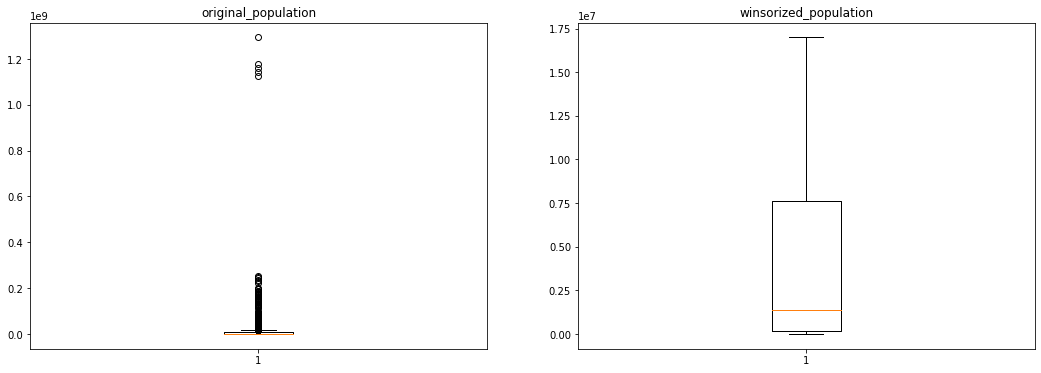

In [34]:
# Winsorize population
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_population = life['population']
plt.boxplot(original_population)
plt.title("original_population")

plt.subplot(1,2,2)
winsorized_population = winsorize(life['population'],(0,0.14))
plt.boxplot(winsorized_population)
plt.title("winsorized_population")

plt.show()

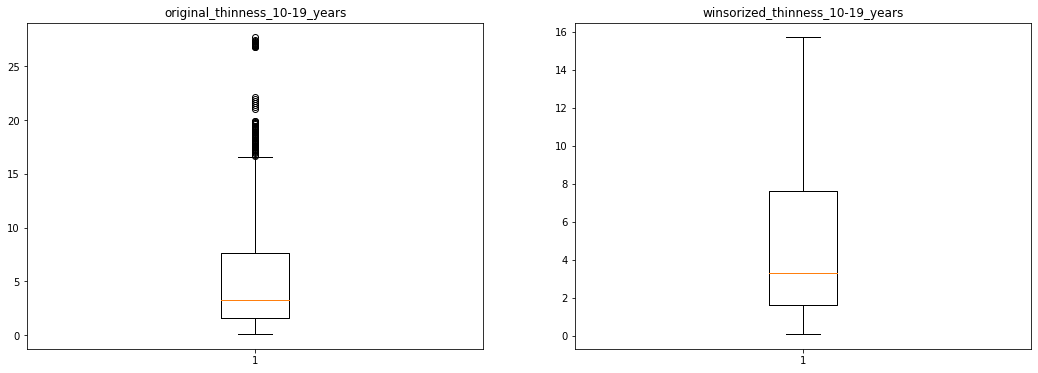

In [35]:
# Winsorize thinness_10-19_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_10to19_years = life['thinness_10-19_years']
plt.boxplot(original_thinness_10to19_years)
plt.title("original_thinness_10-19_years")

plt.subplot(1,2,2)
winsorized_thinness_10to19_years = winsorize(life['thinness_10-19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_10to19_years)
plt.title("winsorized_thinness_10-19_years")

plt.show()

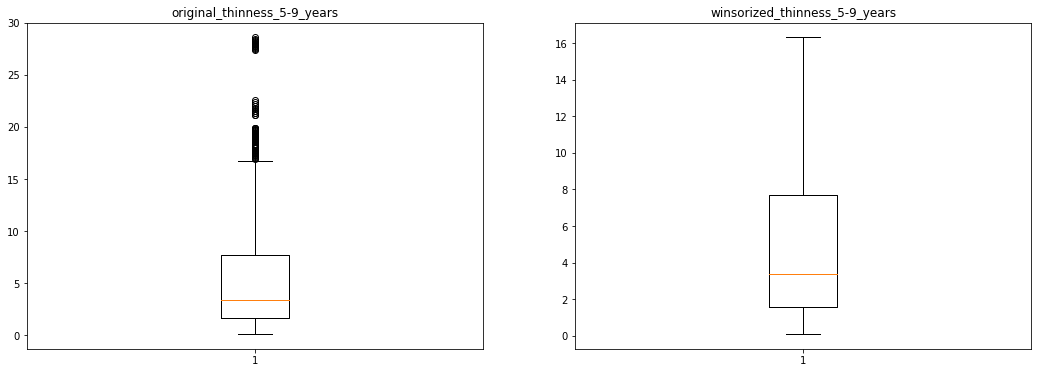

In [36]:
# Winsorize thinness_5-9_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = life['thinness_5-9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5-9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(life['thinness_5-9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5-9_years")

plt.show()

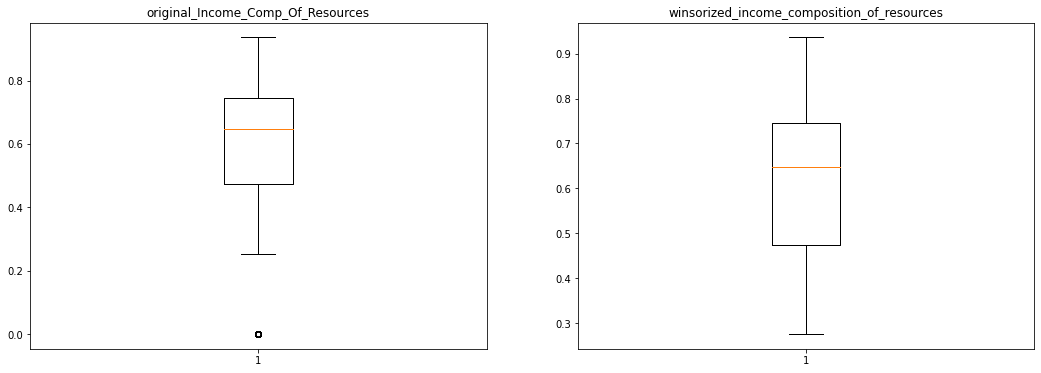

In [37]:
# Winsorize income_composition_of_resources
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_income_composition_of_resources = life['income_composition_of_resources']
plt.boxplot(original_income_composition_of_resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_income_composition_of_resources = winsorize(life['income_composition_of_resources'],(0.05,0))
plt.boxplot(winsorized_income_composition_of_resources)
plt.title("winsorized_income_composition_of_resources")

plt.show()

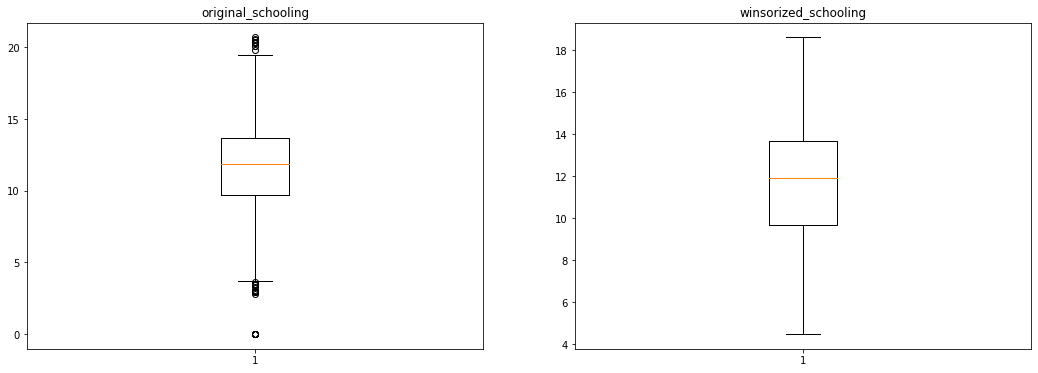

In [38]:
# Winsorize schooling
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_schooling = life['schooling']
plt.boxplot(original_schooling)
plt.title("original_schooling")

plt.subplot(1,2,2)
winsorized_schooling = winsorize(life['schooling'],(0.02,0.01))
plt.boxplot(winsorized_schooling)
plt.title("winsorized_schooling")

plt.show()

In [39]:
# number of outliers after winsorization
win_list = [winsorized_life_expectancy,winsorized_adult_mortality,winsorized_infant_deaths,winsorized_alcohol,
            winsorized_percentage_expenditure,winsorized_hepatitis_b,winsorized_under_five_deaths,winsorized_polio,winsorized_total_expenditure,winsorized_diphtheria,winsorized_hiv_aids,winsorized_gdp,winsorized_population,winsorized_thinness_10to19_years,winsorized_thinness_5to9_years,winsorized_income_composition_of_resources,winsorized_schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization of : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))
    

Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0
Number of outliers after winsorization of : 0


In [40]:
# adding winsorized variables to the data frame.
life['winsorized_life_expectancy'] = winsorized_life_expectancy
life['winsorized_adult_mortality'] = winsorized_adult_mortality
life['winsorized_infant_deaths'] = winsorized_infant_deaths
life['winsorized_alcohol'] = winsorized_alcohol
life['winsorized_percentage_expenditure'] = winsorized_percentage_expenditure
life['winsorized_hepatitis_b'] = winsorized_hepatitis_b
life['winsorized_under_five_deaths'] = winsorized_under_five_deaths
life['winsorized_polio'] = winsorized_polio
life['winsorized_total_expenditure'] = winsorized_total_expenditure
life['winsorized_diphtheria'] = winsorized_diphtheria
life['winsorized_hiv_aids'] = winsorized_hiv_aids
life['winsorized_gdp'] = winsorized_gdp
life['winsorized_population'] = winsorized_population
life['winsorized_thinness_10to19_years'] = winsorized_thinness_10to19_years
life['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
life['winsorized_income_composition_of_resources'] = winsorized_income_composition_of_resources
life['winsorized_schooling'] = winsorized_schooling

### **Univariate Analysis**

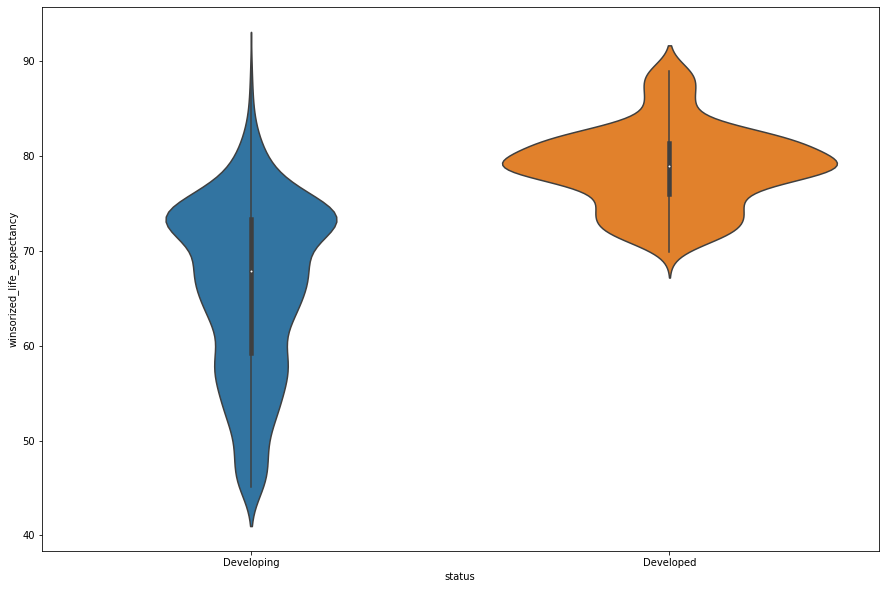

In [41]:
# plotting violin plot of 'status' against 'life_expectancy'
plt.figure(figsize=(15,10))
sns.violinplot(x=life['status'], y=life['winsorized_life_expectancy'])
plt.show()

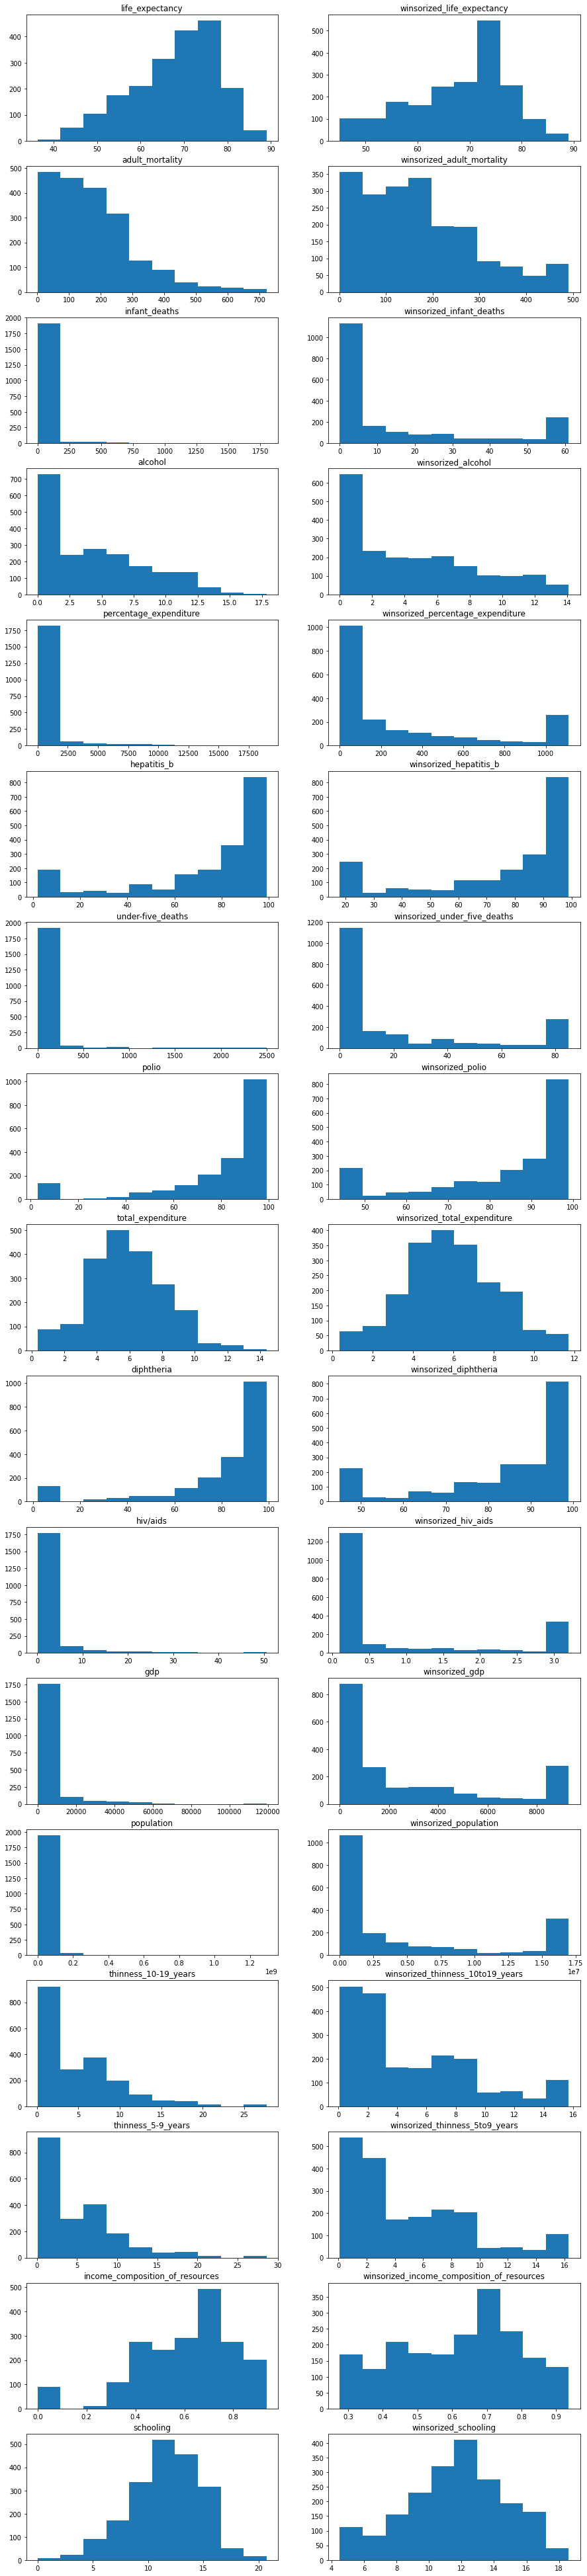

In [42]:
# Distribution of each numerical variable.
all_columns = ['life_expectancy','winsorized_life_expectancy','adult_mortality','winsorized_adult_mortality','infant_deaths',
         'winsorized_infant_deaths','alcohol','winsorized_alcohol','percentage_expenditure','winsorized_percentage_expenditure','hepatitis_b',
         'winsorized_hepatitis_b','under-five_deaths','winsorized_under_five_deaths','polio','winsorized_polio','total_expenditure',
         'winsorized_total_expenditure','diphtheria','winsorized_diphtheria','hiv/aids','winsorized_hiv_aids','gdp','winsorized_gdp',
         'population','winsorized_population','thinness_10-19_years','winsorized_thinness_10to19_years','thinness_5-9_years',
         'winsorized_thinness_5to9_years','income_composition_of_resources','winsorized_income_composition_of_resources',
         'schooling','winsorized_schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_columns)):
    plt.subplot(18,2,i+1)
    plt.hist(life[all_columns[i]])
    plt.title(all_columns[i])

plt.show()

In [43]:
# descriptive statistics of categorical variables.
life.describe(include=['O'])

,country,status
count,1987,1987
unique,133,2
top,Afghanistan,Developing
freq,16,1702


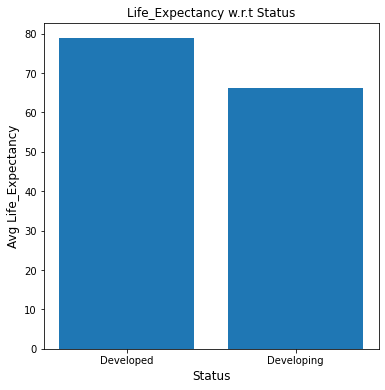

In [44]:
# life_expectancy w.r.t status using bar plot.
plt.figure(figsize=(6,6))
plt.bar(life.groupby('status')['status'].count().index,life.groupby('status')['winsorized_life_expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

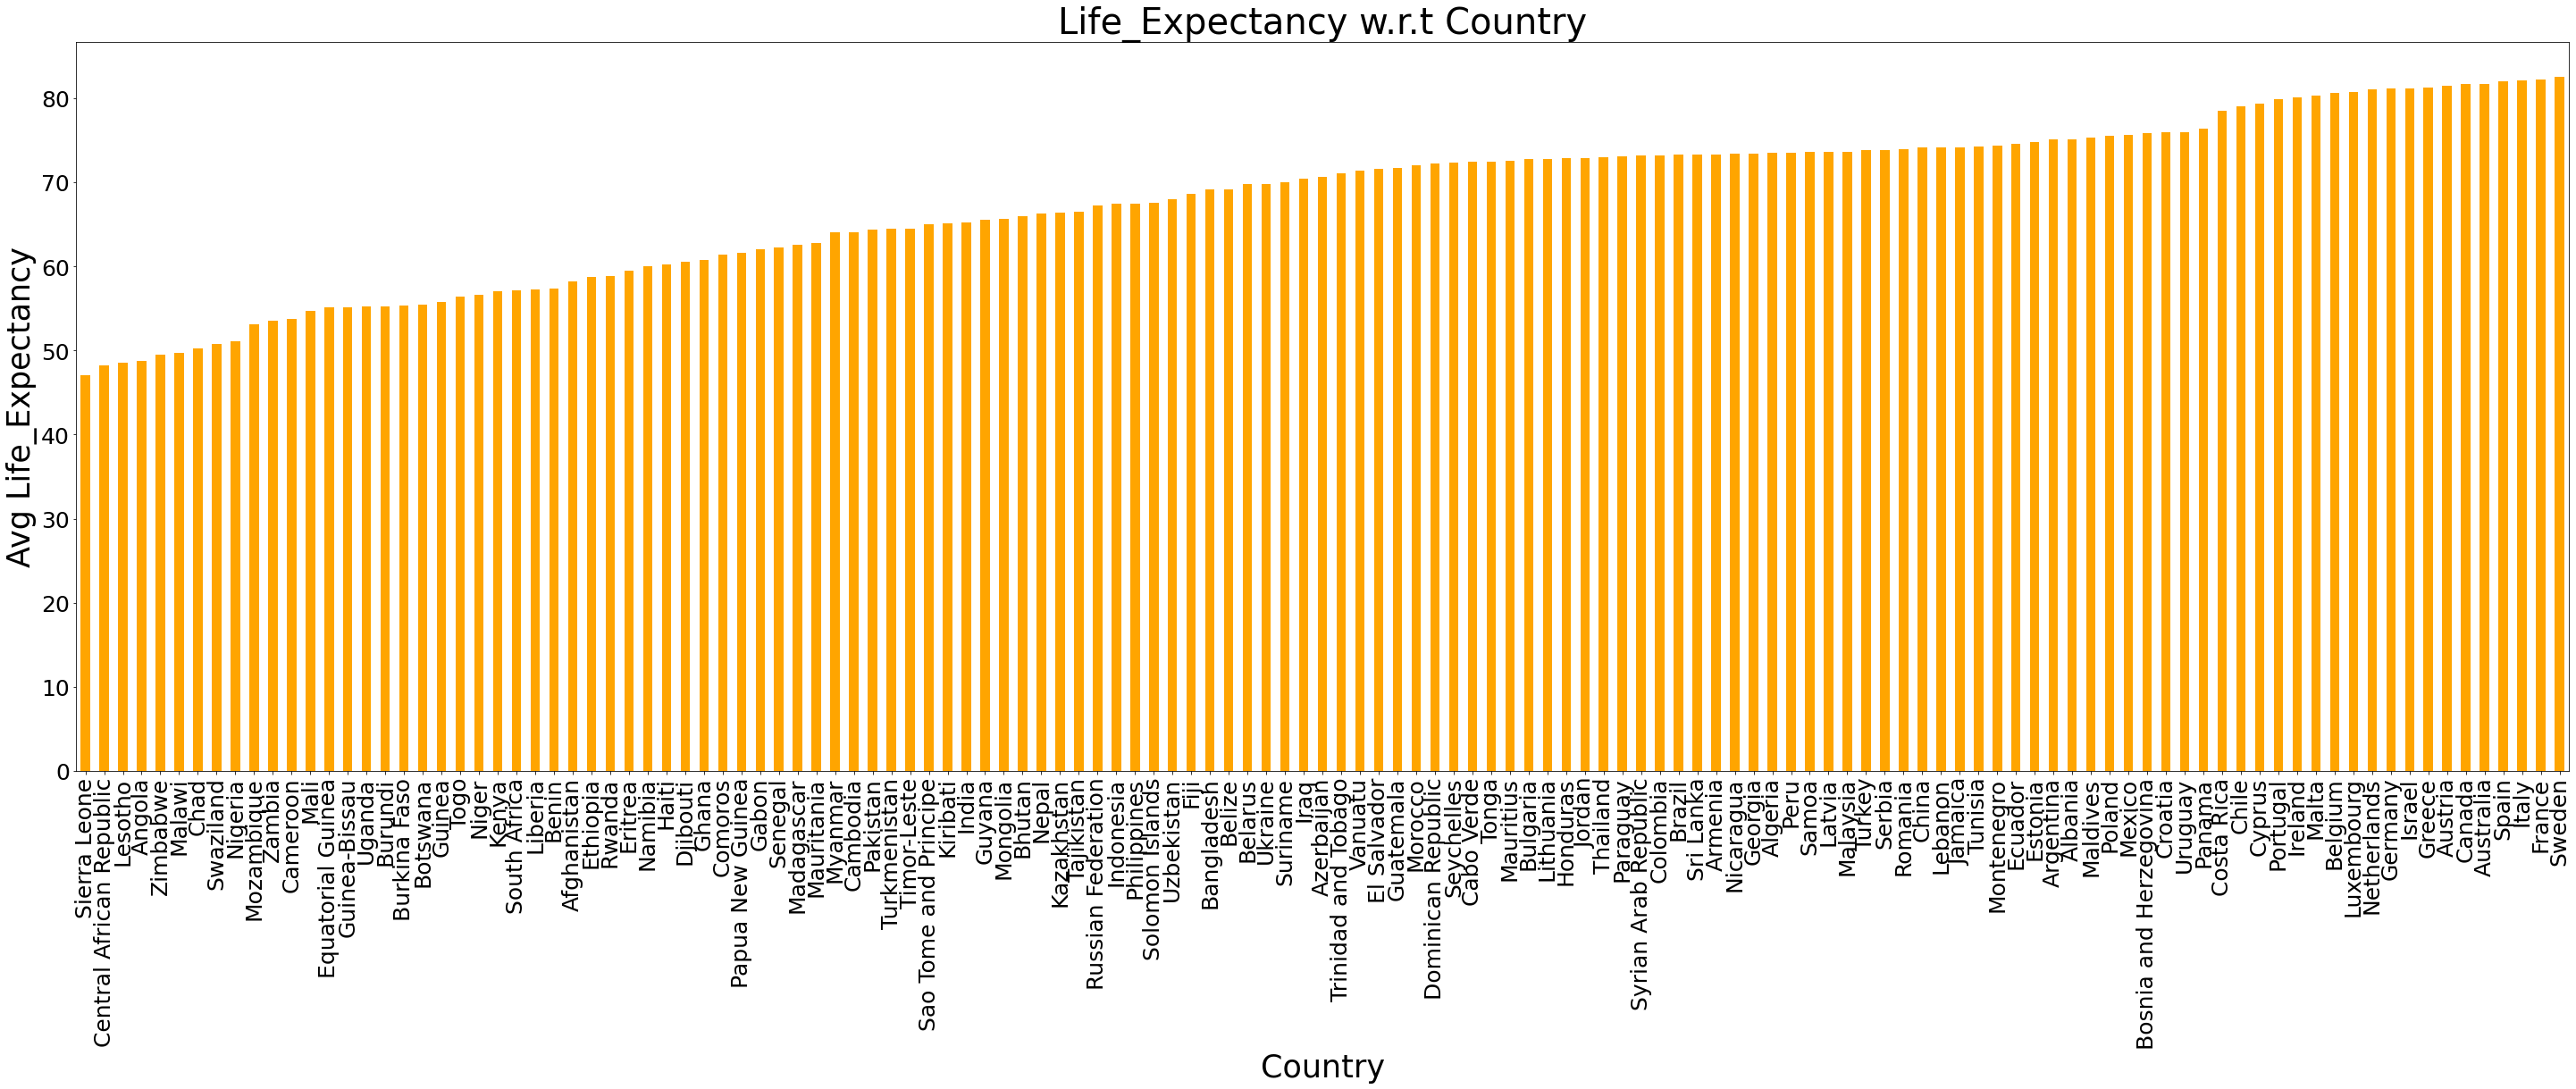

In [45]:
# life_expectancy w.r.t country using bar plot.
life_country = life.groupby('country')['winsorized_life_expectancy'].mean()
life_country.sort_values().plot(kind='bar', figsize=(50,15), fontsize=25, color='orange')
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

### **How different diseases affect life expectancy in developed and developing countries**

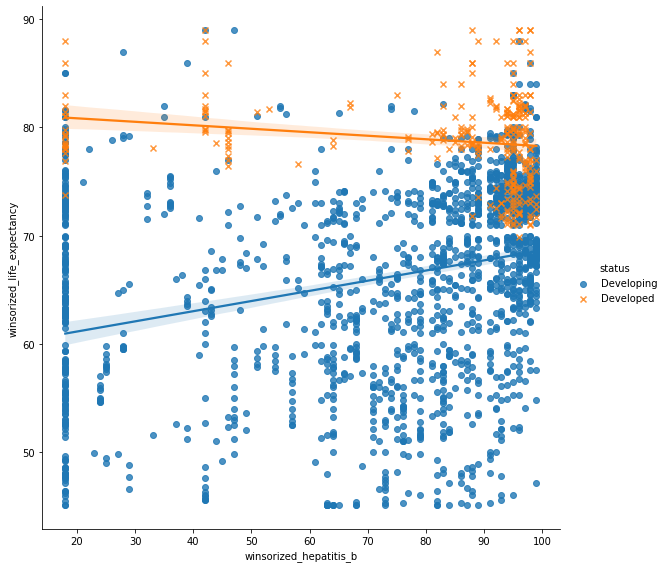

In [61]:
sns.pairplot(life, x_vars=["winsorized_hepatitis_b"], y_vars=["winsorized_life_expectancy"], hue="status", markers=["o", "x"], height=8, kind="reg");

There is a slight decrease in the life expectancy value in case of developed countries whereas in case of Developed countries the life expectancy value is gradually rising which means that developing countries are taking measures for setting up vaccine of hepatitis B

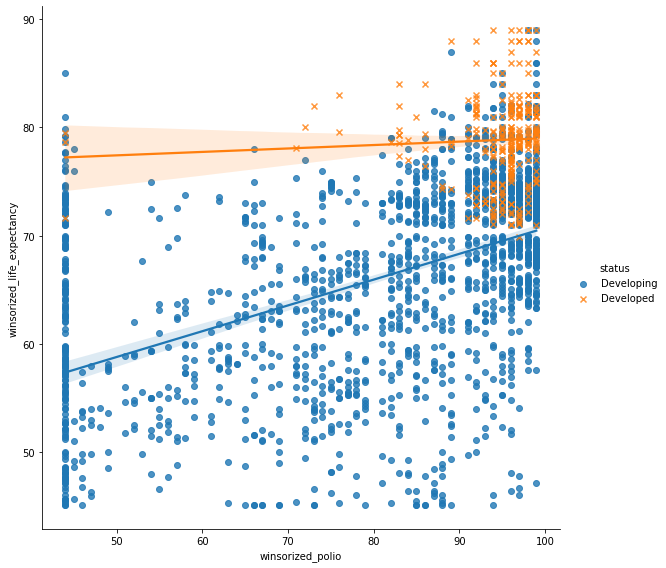

In [60]:
sns.pairplot(life, x_vars=["winsorized_polio"], y_vars=["winsorized_life_expectancy"], hue="status", markers=["o", "x"], height=8, kind="reg");

Developed countries seems to have successfully eradicated polio diesease because of vaccines whereas in developing countries there was low expectancy value initially but now it is gradually increasing maybe because of proper doses being given

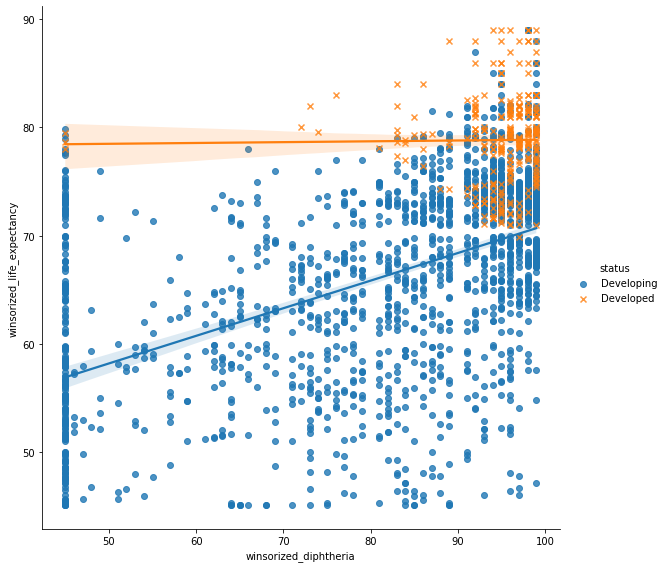

In [62]:
sns.pairplot(life, x_vars=["winsorized_diphtheria"], y_vars=["winsorized_life_expectancy"], hue="status", markers=["o", "x"], height=8, kind="reg");

Developed countries seems to have successfully eradicated diptheria diesease because of vaccines whereas in developing countries there was low expectancy value initially but now it is gradually increasing maybe because of proper doses being given

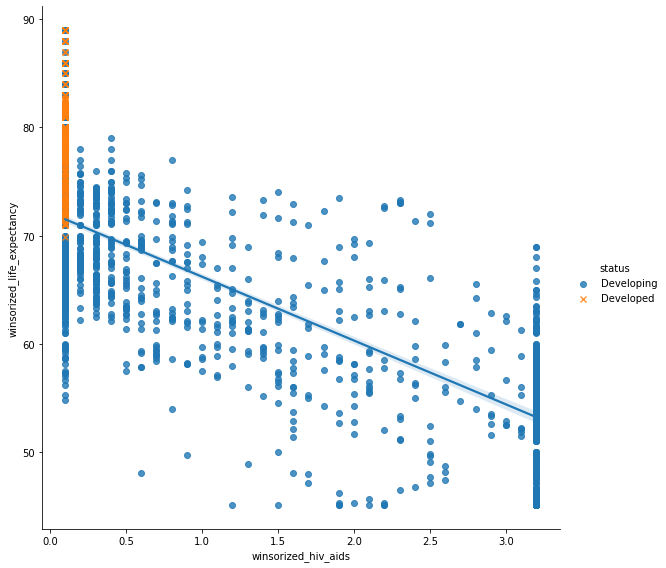

In [64]:
sns.pairplot(life, x_vars=["winsorized_hiv_aids"], y_vars=["winsorized_life_expectancy"], hue="status", markers=["o", "x"], height=8, kind="reg");


The graph shows that developing countries still have not been able to handle hiv/aids at all as the life expectancy value is decreasing at a rapid range. This can be due to rising population and no education been given

### **Effect of schooling and alcohol on life expectancy**

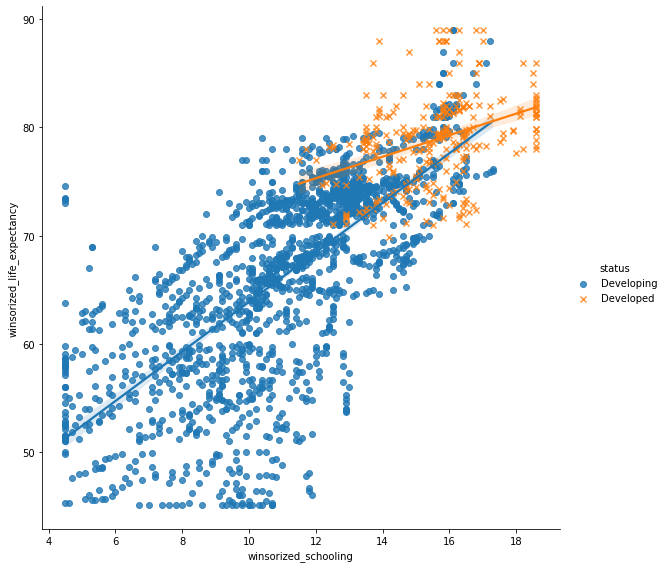

In [66]:
sns.pairplot(life, x_vars=["winsorized_schooling"], y_vars=["winsorized_life_expectancy"], hue="status", markers=["o", "x"], height=8, kind="reg")

Schooling can effect life expectancy more in developing countries than developed countries. This may be because education is more established and prevalent in wealthier countries. 

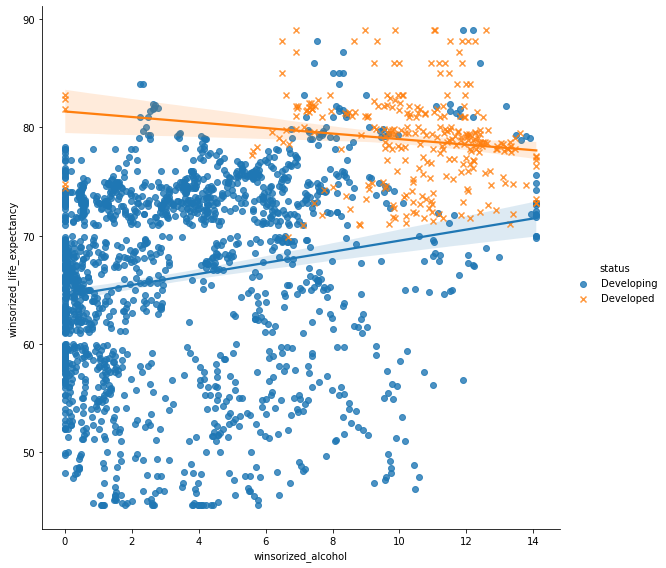

In [68]:
sns.pairplot(life, x_vars=["winsorized_alcohol"], y_vars=["winsorized_life_expectancy"], hue="status", markers=["o", "x"], height=8, kind="reg")

Only wealthier countries can afford alcohol or the consumption of alcohol is more prevalent among wealthier populations. That is why developing countries and alcohol have positive relation and developed countries and alcohol have negative relation.

### **Multivariate Analysis**

In [46]:
# correlation of winsorized variables
life_win = life.iloc[:,21:]
life_win['country'] = life['country']
life_win['year'] = life['year']
life_win['status'] = life['status']
life_win_num = life_win.iloc[:,:-3]
cor = life_win_num.corr()

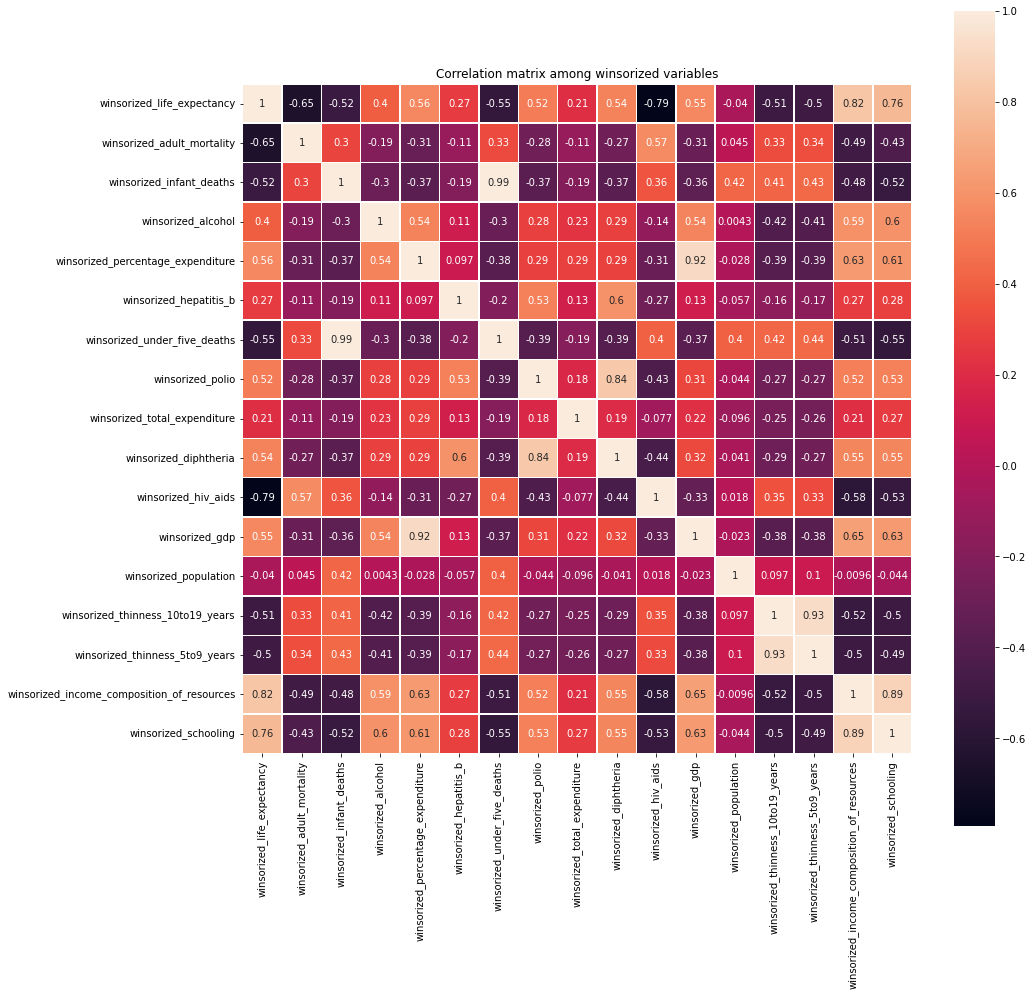

In [47]:
# using heatmap to observe correlations.
plt.figure(figsize=(15,15))
sns.heatmap(cor, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

### **Feature Engineering**

In [48]:
round(life[['status','life_expectancy']].groupby(['status']).mean(),2)

,life_expectancy
status,
Developed,78.83
Developing,66.16


In [49]:
# finding the significance of difference of average_life_expectancy between developed and developing countries using t-test
import scipy.stats as stats
stats.ttest_ind(life.loc[life['status']=='Developed','life_expectancy'],life.loc[life['status']=='Developing','life_expectancy'])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

In [50]:
# plotting line graph to show the life expectancy of all the countries over the years
fig=px.line(life.sort_values(by='year'), x='year', y='winsorized_life_expectancy', animation_frame='country', animation_group='year', color='country', markers=True, title='<b> Country wise Life Expectancy over Years')
fig.update_layout(yaxis=dict(range=[30,100]))
fig.show()